In [30]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from torch.autograd import Variable
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [32]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 5 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [33]:

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [34]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [35]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [36]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [37]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [38]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [39]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [40]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [41]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [42]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [43]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [02:22,  1.21s/it]


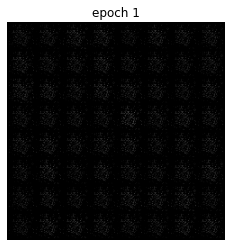

Epoch 1 of 100
Generator loss: 8.73444557, Discriminator loss: 0.30275646


118it [02:21,  1.20s/it]


Epoch 2 of 100
Generator loss: 11.49775124, Discriminator loss: 0.25842437


118it [02:22,  1.21s/it]


Epoch 3 of 100
Generator loss: 10.11139202, Discriminator loss: 0.14475037


118it [02:31,  1.28s/it]


Epoch 4 of 100
Generator loss: 10.10904884, Discriminator loss: 0.02151489


118it [02:31,  1.29s/it]


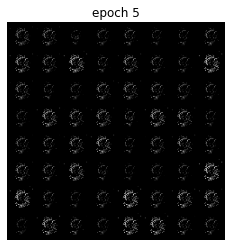

Epoch 5 of 100
Generator loss: 12.03996754, Discriminator loss: 0.01611269


118it [02:26,  1.24s/it]


Epoch 6 of 100
Generator loss: 12.20936871, Discriminator loss: 0.01107390


118it [02:27,  1.25s/it]


Epoch 7 of 100
Generator loss: 12.20283508, Discriminator loss: 0.00888462


118it [02:27,  1.25s/it]


Epoch 8 of 100
Generator loss: 11.79311752, Discriminator loss: 0.12824142


118it [02:29,  1.27s/it]


Epoch 9 of 100
Generator loss: 15.16959095, Discriminator loss: 0.07168205


118it [02:26,  1.24s/it]


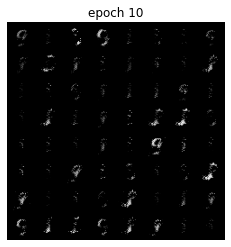

Epoch 10 of 100
Generator loss: 12.27390194, Discriminator loss: 0.04279054


118it [02:27,  1.25s/it]


Epoch 11 of 100
Generator loss: 11.87016106, Discriminator loss: 0.04457483


118it [02:26,  1.24s/it]


Epoch 12 of 100
Generator loss: 11.19858551, Discriminator loss: 0.19280535


118it [02:26,  1.24s/it]


Epoch 13 of 100
Generator loss: 10.41067314, Discriminator loss: 0.08556287


118it [02:29,  1.27s/it]


Epoch 14 of 100
Generator loss: 10.17366409, Discriminator loss: 0.11474461


118it [02:28,  1.26s/it]


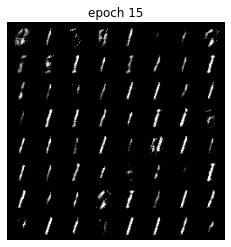

Epoch 15 of 100
Generator loss: 9.38014793, Discriminator loss: 0.09450437


118it [02:26,  1.24s/it]


Epoch 16 of 100
Generator loss: 7.86872482, Discriminator loss: 0.23601383


118it [02:27,  1.25s/it]


Epoch 17 of 100
Generator loss: 7.06856155, Discriminator loss: 0.28762659


118it [02:26,  1.24s/it]


Epoch 18 of 100
Generator loss: 6.60930443, Discriminator loss: 0.28602144


118it [02:26,  1.24s/it]


Epoch 19 of 100
Generator loss: 7.01012468, Discriminator loss: 0.28664446


118it [02:24,  1.22s/it]


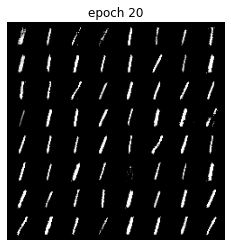

Epoch 20 of 100
Generator loss: 6.79256248, Discriminator loss: 0.27493015


118it [02:23,  1.22s/it]


Epoch 21 of 100
Generator loss: 6.53249598, Discriminator loss: 0.34637463


118it [02:27,  1.25s/it]


Epoch 22 of 100
Generator loss: 6.28563023, Discriminator loss: 0.39108342


118it [02:30,  1.27s/it]


Epoch 23 of 100
Generator loss: 5.93121862, Discriminator loss: 0.45226198


118it [02:30,  1.27s/it]


Epoch 24 of 100
Generator loss: 5.35528135, Discriminator loss: 0.53918725


118it [02:31,  1.29s/it]


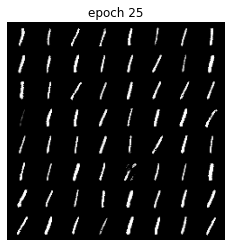

Epoch 25 of 100
Generator loss: 4.87666655, Discriminator loss: 0.65459764


118it [02:29,  1.26s/it]


Epoch 26 of 100
Generator loss: 4.65306425, Discriminator loss: 0.69031787


118it [02:30,  1.27s/it]


Epoch 27 of 100
Generator loss: 4.35012388, Discriminator loss: 0.76319855


118it [02:39,  1.35s/it]


Epoch 28 of 100
Generator loss: 4.47895241, Discriminator loss: 0.77172822


118it [02:33,  1.30s/it]


Epoch 29 of 100
Generator loss: 4.43050861, Discriminator loss: 0.79486769


118it [02:30,  1.28s/it]


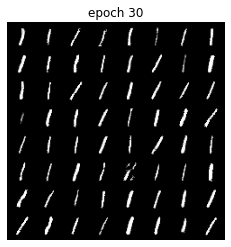

Epoch 30 of 100
Generator loss: 4.42517185, Discriminator loss: 0.81771111


118it [02:30,  1.27s/it]


Epoch 31 of 100
Generator loss: 4.23550510, Discriminator loss: 0.85394078


118it [02:27,  1.25s/it]


Epoch 32 of 100
Generator loss: 3.95037508, Discriminator loss: 0.96179050


118it [02:25,  1.23s/it]


Epoch 33 of 100
Generator loss: 3.68012857, Discriminator loss: 1.03584623


118it [02:34,  1.31s/it]


Epoch 34 of 100
Generator loss: 3.70265818, Discriminator loss: 1.06774426


118it [02:31,  1.28s/it]


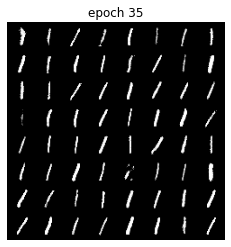

Epoch 35 of 100
Generator loss: 3.89952278, Discriminator loss: 1.01863837


118it [02:29,  1.26s/it]


Epoch 36 of 100
Generator loss: 3.74990129, Discriminator loss: 1.10549033


118it [02:27,  1.25s/it]


Epoch 37 of 100
Generator loss: 3.64165926, Discriminator loss: 1.13111436


118it [02:29,  1.26s/it]


Epoch 38 of 100
Generator loss: 3.79745650, Discriminator loss: 1.08723056


118it [02:22,  1.21s/it]


Epoch 39 of 100
Generator loss: 3.76635408, Discriminator loss: 1.06060481


118it [02:23,  1.22s/it]


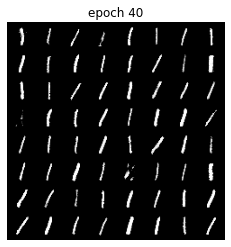

Epoch 40 of 100
Generator loss: 3.66277146, Discriminator loss: 1.10321772


118it [02:23,  1.21s/it]


Epoch 41 of 100
Generator loss: 3.64900899, Discriminator loss: 1.12121487


118it [02:27,  1.25s/it]


Epoch 42 of 100
Generator loss: 3.55052233, Discriminator loss: 1.17314422


118it [02:24,  1.23s/it]


Epoch 43 of 100
Generator loss: 3.35056090, Discriminator loss: 1.21519625


118it [02:22,  1.21s/it]


Epoch 44 of 100
Generator loss: 3.49166989, Discriminator loss: 1.21470010


118it [02:22,  1.20s/it]


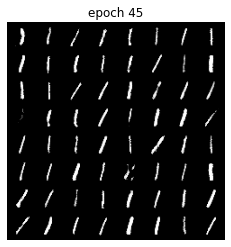

Epoch 45 of 100
Generator loss: 3.31120515, Discriminator loss: 1.25704026


118it [02:20,  1.19s/it]


Epoch 46 of 100
Generator loss: 3.33858204, Discriminator loss: 1.26391923


118it [02:20,  1.19s/it]


Epoch 47 of 100
Generator loss: 3.17416668, Discriminator loss: 1.31292319


118it [02:22,  1.21s/it]


Epoch 48 of 100
Generator loss: 3.12969589, Discriminator loss: 1.35656524


118it [02:21,  1.20s/it]


Epoch 49 of 100
Generator loss: 3.15862775, Discriminator loss: 1.35205388


118it [02:22,  1.20s/it]


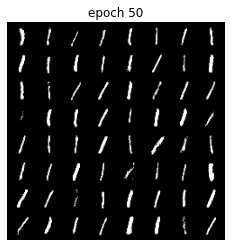

Epoch 50 of 100
Generator loss: 3.04538083, Discriminator loss: 1.40449846


118it [02:19,  1.19s/it]


Epoch 51 of 100
Generator loss: 3.03243780, Discriminator loss: 1.44888735


118it [02:20,  1.19s/it]


Epoch 52 of 100
Generator loss: 3.01066828, Discriminator loss: 1.43460190


118it [02:24,  1.22s/it]


Epoch 53 of 100
Generator loss: 3.08647776, Discriminator loss: 1.43133223


118it [02:24,  1.22s/it]


Epoch 54 of 100
Generator loss: 3.06584430, Discriminator loss: 1.45608473


118it [02:23,  1.21s/it]


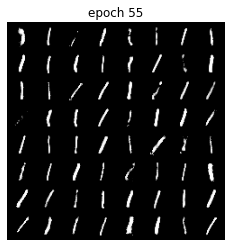

Epoch 55 of 100
Generator loss: 2.91927338, Discriminator loss: 1.50084519


118it [02:23,  1.21s/it]


Epoch 56 of 100
Generator loss: 2.90975404, Discriminator loss: 1.52752793


118it [02:23,  1.21s/it]


Epoch 57 of 100
Generator loss: 2.90073347, Discriminator loss: 1.50928032


118it [02:22,  1.21s/it]


Epoch 58 of 100
Generator loss: 2.93132496, Discriminator loss: 1.50902438


118it [02:21,  1.20s/it]


Epoch 59 of 100
Generator loss: 3.09879613, Discriminator loss: 1.44998121


118it [02:20,  1.19s/it]


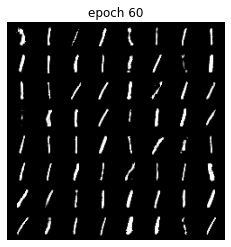

Epoch 60 of 100
Generator loss: 3.00972223, Discriminator loss: 1.49751890


118it [02:22,  1.20s/it]


Epoch 61 of 100
Generator loss: 3.02857876, Discriminator loss: 1.48667800


118it [02:21,  1.20s/it]


Epoch 62 of 100
Generator loss: 2.94563866, Discriminator loss: 1.49061918


118it [02:20,  1.19s/it]


Epoch 63 of 100
Generator loss: 3.00022697, Discriminator loss: 1.51582444


118it [02:21,  1.20s/it]


Epoch 64 of 100
Generator loss: 2.90949774, Discriminator loss: 1.53964090


118it [02:20,  1.19s/it]


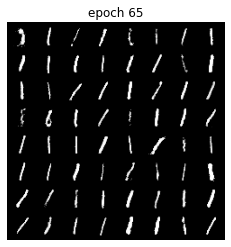

Epoch 65 of 100
Generator loss: 2.92735767, Discriminator loss: 1.56177092


118it [02:22,  1.21s/it]


Epoch 66 of 100
Generator loss: 2.80191159, Discriminator loss: 1.61148703


118it [02:22,  1.21s/it]


Epoch 67 of 100
Generator loss: 2.85102654, Discriminator loss: 1.59946501


118it [02:23,  1.21s/it]


Epoch 68 of 100
Generator loss: 2.90246463, Discriminator loss: 1.58736205


118it [02:21,  1.20s/it]


Epoch 69 of 100
Generator loss: 2.77836943, Discriminator loss: 1.62574208


118it [02:20,  1.19s/it]


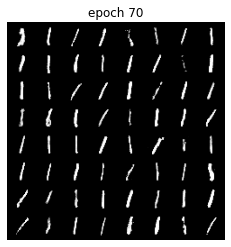

Epoch 70 of 100
Generator loss: 2.88340044, Discriminator loss: 1.56784165


118it [02:25,  1.24s/it]


Epoch 71 of 100
Generator loss: 2.86151457, Discriminator loss: 1.59639275


118it [02:29,  1.27s/it]


Epoch 72 of 100
Generator loss: 2.71100950, Discriminator loss: 1.65801477


118it [02:26,  1.24s/it]


Epoch 73 of 100
Generator loss: 2.81764364, Discriminator loss: 1.61599588


118it [02:22,  1.20s/it]


Epoch 74 of 100
Generator loss: 2.72983956, Discriminator loss: 1.64868116


118it [02:21,  1.20s/it]


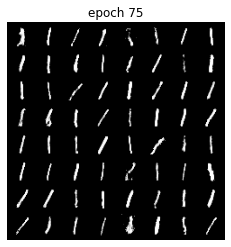

Epoch 75 of 100
Generator loss: 2.71431923, Discriminator loss: 1.65642881


118it [02:24,  1.22s/it]


Epoch 76 of 100
Generator loss: 2.80002499, Discriminator loss: 1.61363125


118it [02:19,  1.19s/it]


Epoch 77 of 100
Generator loss: 2.74660397, Discriminator loss: 1.64156795


118it [02:19,  1.18s/it]


Epoch 78 of 100
Generator loss: 2.73515463, Discriminator loss: 1.65184736


118it [02:20,  1.19s/it]


Epoch 79 of 100
Generator loss: 2.71894884, Discriminator loss: 1.65586102


118it [02:18,  1.18s/it]


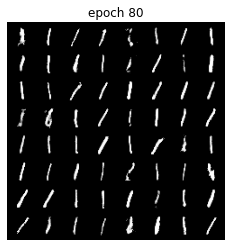

Epoch 80 of 100
Generator loss: 2.77060032, Discriminator loss: 1.62890053


118it [02:20,  1.19s/it]


Epoch 81 of 100
Generator loss: 2.69411707, Discriminator loss: 1.66180587


118it [02:20,  1.19s/it]


Epoch 82 of 100
Generator loss: 2.73045826, Discriminator loss: 1.66272938


118it [02:18,  1.17s/it]


Epoch 83 of 100
Generator loss: 2.78396082, Discriminator loss: 1.62772119


118it [02:19,  1.18s/it]


Epoch 84 of 100
Generator loss: 2.77275276, Discriminator loss: 1.63397002


118it [02:18,  1.17s/it]


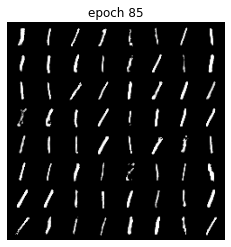

Epoch 85 of 100
Generator loss: 2.81775522, Discriminator loss: 1.62318277


118it [02:21,  1.20s/it]


Epoch 86 of 100
Generator loss: 2.73196054, Discriminator loss: 1.66388655


118it [02:26,  1.24s/it]


Epoch 87 of 100
Generator loss: 2.76843905, Discriminator loss: 1.62198102


118it [02:22,  1.21s/it]


Epoch 88 of 100
Generator loss: 2.75785589, Discriminator loss: 1.64252770


118it [02:22,  1.20s/it]


Epoch 89 of 100
Generator loss: 2.72307682, Discriminator loss: 1.65073740


118it [02:20,  1.19s/it]


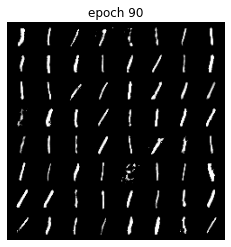

Epoch 90 of 100
Generator loss: 2.70484781, Discriminator loss: 1.65719450


118it [02:20,  1.19s/it]


Epoch 91 of 100
Generator loss: 2.78220654, Discriminator loss: 1.62909234


118it [02:19,  1.18s/it]


Epoch 92 of 100
Generator loss: 2.74713087, Discriminator loss: 1.64163888


118it [02:19,  1.18s/it]


Epoch 93 of 100
Generator loss: 2.73201346, Discriminator loss: 1.64751947


118it [02:20,  1.19s/it]


Epoch 94 of 100
Generator loss: 2.70292211, Discriminator loss: 1.67965281


118it [02:21,  1.20s/it]


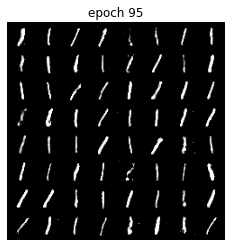

Epoch 95 of 100
Generator loss: 2.69974208, Discriminator loss: 1.66839981


 15%|█▌        | 18/117 [00:21<02:00,  1.21s/it]

In [ ]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    loss = criterion(output, true_label)
    return loss
    
    
def discriminator_loss(output, true_label):
    loss = criterion(output, true_label)
    return loss
    


for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        image, _ = data
        image = image.to(device)
        b_size = len(image)
        for step in range(k):
            data_fake = generator(create_noise(b_size, nz)).detach()
            data_real = image
            b_size = data_real.size(0)
            real_label = label_real(b_size)
            fake_label = label_fake(b_size)
            optim_d.zero_grad()
            output_real = discriminator(data_real)
            loss_real = discriminator_loss(output_real, real_label)
            output_fake = discriminator(data_fake)
            loss_fake = discriminator_loss(output_fake, fake_label)
            loss_real.backward()
            loss_fake.backward()
            optim_d.step()
            loss_d += loss_real + loss_fake
        data_fake = generator(create_noise(b_size, nz))
        b_size = data_fake.size(0)
        real_label = label_real(b_size)
        optim_g.zero_grad()
        output = discriminator(data_fake)
        loss = generator_loss(output, real_label)
        loss.backward()
        optim_g.step()
        loss_g += loss
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0 or (epoch + 1) == 1:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [ ]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

In [ ]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

[tensor(8.7344, grad_fn=<DivBackward0>), tensor(11.4978, grad_fn=<DivBackward0>), tensor(10.1114, grad_fn=<DivBackward0>), tensor(10.1090, grad_fn=<DivBackward0>), tensor(12.0400, grad_fn=<DivBackward0>), tensor(12.2094, grad_fn=<DivBackward0>), tensor(12.2028, grad_fn=<DivBackward0>), tensor(11.7931, grad_fn=<DivBackward0>), tensor(15.1696, grad_fn=<DivBackward0>), tensor(12.2739, grad_fn=<DivBackward0>), tensor(11.8702, grad_fn=<DivBackward0>), tensor(11.1986, grad_fn=<DivBackward0>), tensor(10.4107, grad_fn=<DivBackward0>), tensor(10.1737, grad_fn=<DivBackward0>), tensor(9.3801, grad_fn=<DivBackward0>), tensor(7.8687, grad_fn=<DivBackward0>), tensor(7.0686, grad_fn=<DivBackward0>), tensor(6.6093, grad_fn=<DivBackward0>), tensor(7.0101, grad_fn=<DivBackward0>), tensor(6.7926, grad_fn=<DivBackward0>), tensor(6.5325, grad_fn=<DivBackward0>), tensor(6.2856, grad_fn=<DivBackward0>), tensor(5.9312, grad_fn=<DivBackward0>), tensor(5.3553, grad_fn=<DivBackward0>), tensor(4.8767, grad_fn=<Di

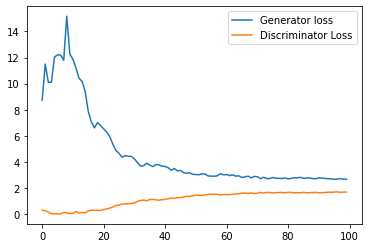

In [45]:
# plot and save the generator and discriminator loss
plt.figure()
generator_loss = []
discriminator_loss = []
print(losses_g)
print(losses_d)
for i in losses_g:
  val = i.detach().numpy()
  generator_loss.append(float(i))
for i in losses_d:
  val = i.detach().numpy()
  discriminator_loss.append(float(i))
print(generator_loss)
print(len(generator_loss))
print(discriminator_loss)

plt.plot(generator_loss[0:100], label='Generator loss')
plt.plot(discriminator_loss[0:100], label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')